In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
print(df.head(5))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
print(df.isnull().sum())


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [6]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


In [7]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


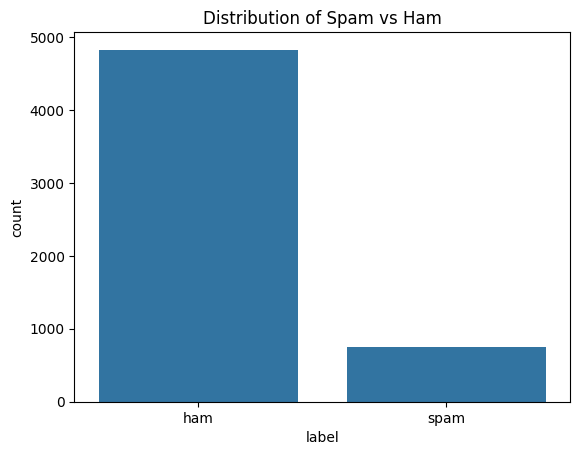

In [8]:
# Visualize the distribution
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam vs Ham')
plt.show()

In [9]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


In [10]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
# Define a function to clean the text
def clean_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [12]:
# Apply the cleaning function to the 'message' column
df['clean_message'] = df['message'].apply(clean_text)


In [13]:
# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_message']).toarray()


In [14]:
# Encode the labels (spam = 1, ham = 0)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])


In [15]:
# Check the shape of the feature matrix
print("\nShape of the feature matrix:", X.shape)


Shape of the feature matrix: (5572, 9376)


In [16]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
print("Testing set shape:", X_test.shape)

Testing set shape: (1115, 9376)


In [19]:
from sklearn.naive_bayes import MultinomialNB


In [20]:
# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9757847533632287

Confusion Matrix:
[[951  14]
 [ 13 137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.91      0.91       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [25]:
# Function to predict whether a new message is spam or ham
def predict_spam(message):
    # Clean the input message
    cleaned_message = clean_text(message)
    # Convert the message to numerical features
    message_vector = vectorizer.transform([cleaned_message]).toarray()
    # Predict the label
    prediction = model.predict(message_vector)
    return 'Spam' if prediction[0] == 1 else 'Ham'

# Test the function with a custom message
custom_message = "Congratulations! You've won a free iPhone. Click here to claim."
print("\nPrediction for custom message:", predict_spam(custom_message))

custom_message = "Hey, can we meet tomorrow?"
print("Prediction for custom message:", predict_spam(custom_message))


Prediction for custom message: Spam
Prediction for custom message: Ham


In [26]:
# Save the trained model and vectorizer for future use
import joblib


In [27]:
joblib.dump(model, 'spam_detector_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [28]:
# To load the model later:
# model = joblib.load('spam_detector_model.pkl')
# vectorizer = joblib.load('vectorizer.pkl')
